In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import matplotlib as mpl

import pickle

import MuC.MuC as dg
from MuC import const
from MuC import collider_tools as col
from MuC import plot_tools as pt

import seaborn as sns

## Make plot of forward neutrino flux

In [ ]:
NEVENTS = 1e6

col_designs = [col.muc_10tev, col.muc_3tev, col.mut_2tev]
col_sims = []
for design in col_designs:
    if design == col.muc_10tev:
        sim = dg.BINSimulator(design=design, N_evals = NEVENTS, save_mem=False, remove_ring_fraction=0.9, lattice='beam-optics/ring_v06_smoothed.pkl')
    elif design == col.muc_3tev:
        sim = dg.BINSimulator(design=design, N_evals = NEVENTS, save_mem=False, remove_ring_fraction=0.9, lattice='beam-optics/ring_3tev_v1.2_smoothed.pkl')
    else:
        sim = dg.BINSimulator(design=design, N_evals = NEVENTS, save_mem=False, remove_ring_fraction=0.9, lattice=None)
    col_sims.append(sim.run())

/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numba/core/dispatcher.py:244: UserWarning: Numba extension module 'awkward.numba' failed to load due to 'AttributeError(module 'numpy' has no attribute 'AxisError')'.
  entrypoints.init_all()
/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numba/core/dispatcher.py:244: UserWarning: Numba extension module 'vector' failed to load due to 'AttributeError(module 'numpy' has no attribute 'AxisError')'.
  entrypoints.init_all()


Efficiency of detector acceptance: 2.19e-01
(1026844,) (1026844, 34) (1026844, 34)
Efficiency of detector acceptance: 2.20e-01
(1029737,) (1029737, 34) (1029737, 34)
Efficiency of detector acceptance: 2.19e-01
(1027429,) (1027429, 34) (1027429, 34)
Efficiency of detector acceptance: 2.20e-01
(1028043,) (1028043, 34) (1028043, 34)
Total count: 7.86e+11 events;

Efficiency of detector acceptance: 4.00e-01
(1874736,) (1874736, 34) (1874736, 34)
Efficiency of detector acceptance: 4.05e-01
(1894463,) (1894463, 34) (1894463, 34)
Efficiency of detector acceptance: 4.00e-01
(1872996,) (1872996, 34) (1872996, 34)
Efficiency of detector acceptance: 4.04e-01
(1892433,) (1892433, 34) (1892433, 34)
Total count: 3.39e+11 events;



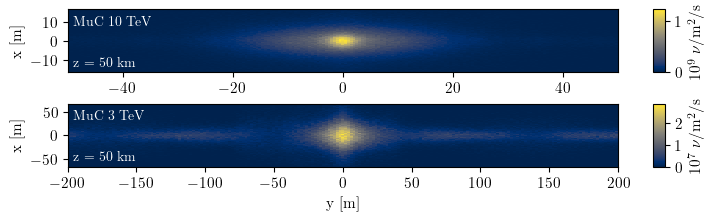

In [204]:
units = 1e2 # meters
SHRINK = 3
IMSIZE = 2

Ldetector = 50e5
forward_det = np.array([0, 0, Ldetector])
RMAX = 50e2
xbins = np.linspace(-RMAX, RMAX, 200)/units
ybins = np.linspace(-RMAX/SHRINK, RMAX/SHRINK, int(len(xbins)/SHRINK))/units

events = sim_muc.mustorage_sims[0]
phi = np.arctan2(events.pnu[:,2], events.pnu[:,1])
theta = events.pnu[:,2]/np.sin(phi)/events.pnu[:,0]
cos_theta = np.cos(theta)
w = events.weights[:, 0] * events.design["finj"] * events.design["bunch_multiplicity"]
z_distance_to_forward_det = np.abs(events.pos[:,2] - forward_det[2])
x_at_detector = np.tan(theta)*z_distance_to_forward_det * np.cos(phi)
y_at_detector = np.tan(theta)*z_distance_to_forward_det * np.sin(phi)

# fig, ax = pt.std_fig(figsize=(IMSIZE,IMSIZE/SHRINK))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=pt.std_figsize*np.array([IMSIZE,IMSIZE/SHRINK]), gridspec_kw={'height_ratios': [1,1]})

h=ax1.hist2d(-y_at_detector/units, x_at_detector/units, weights=w/1e9/np.diff(xbins)[0]/np.diff(ybins)[0], bins=[xbins,ybins], cmap='cividis', cmin=0)
fig.colorbar(h[3], ax=ax1, label=r'$10^9$ $\nu$/m$^2$/s', orientation='vertical', aspect=5, ticks=[0,1,2])

ax1.set_xlim(xbins.min(), xbins.max())
ax1.set_ylim(ybins.min(), ybins.max())

###### 3 TeV
Ldetector = 50e5
forward_det = np.array([0, 0, Ldetector])
RMAX = 200e2
xbins = np.linspace(-RMAX, RMAX, 200)/units
ybins = np.linspace(-RMAX/SHRINK, RMAX/SHRINK, int(len(xbins)/SHRINK))/units

events = sim_muc_3tev.mustorage_sims[0]
phi = np.arctan2(events.pnu[:,2], events.pnu[:,1])
theta = events.pnu[:,2]/np.sin(phi)/events.pnu[:,0]
cos_theta = np.cos(theta)
w = events.weights[:, 0]* events.design["finj"] * events.design["bunch_multiplicity"]
z_distance_to_forward_det = np.abs(events.pos[:,2] - forward_det[2])
x_at_detector = np.tan(theta)*z_distance_to_forward_det * np.cos(phi)
y_at_detector = np.tan(theta)*z_distance_to_forward_det * np.sin(phi)


h=ax2.hist2d(-y_at_detector/units, x_at_detector/units, weights=w/1e7/np.diff(xbins)[0]/np.diff(ybins)[0], bins=[xbins,ybins], cmap='cividis', cmin=0)
fig.colorbar(h[3], ax=ax2, label=r'$10^7$ $\nu$/m$^2$/s', orientation='vertical', aspect=5, ticks=[0,1,2,3,4])
ax2.set_xlim(xbins.min(), xbins.max())
ax2.set_ylim(ybins.min(), ybins.max())

ax2.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_ylabel('x [m]')

fig.subplots_adjust(hspace=0.5)

ax1.annotate('MuC 10 TeV', xy=(0.01, 0.9), xycoords='axes fraction', fontsize=10, ha='left', va='top', color='white')
ax2.annotate('MuC 3 TeV', xy=(0.01, 0.9), xycoords='axes fraction', fontsize=10, ha='left', va='top', color='white')
ax1.annotate('z = 50 km', xy=(0.01, 0.25), xycoords='axes fraction', fontsize=10, ha='left', va='top', color='white')
ax2.annotate('z = 50 km', xy=(0.01, 0.25), xycoords='axes fraction', fontsize=10, ha='left', va='top', color='white')

fig.savefig(f'plots/forward_studies/forward_beam_spot_size.pdf', bbox_inches='tight', dpi=500)

In [341]:
def draw_circle(ax, r0, colors, loc=(0,0), fill=True, dt=30):
    x0, y0 = loc
    dr = np.diff(r0)
    for i in range(len(r0)-1):
        inner_radius = r0[i]
        outer_radius = r0[i+1]

        if fill:
            inner_wedge = Wedge((x0,y0), outer_radius, 0+dt, 180-dt, width=outer_radius - inner_radius, color=colors[i])
            ax.add_patch(inner_wedge)
        outer_wedge = Wedge((x0,y0), outer_radius, 0+dt, 180-dt, width=outer_radius - inner_radius, color=colors[i])
        ax.add_patch(outer_wedge)

    return outer_wedge


def make_net_plot(sim, rmax, n_layers=5, nbins=10, ratio=False, cmap='viridis_r', POL=None):
    
    # Concentric, same area rings
    r0 = np.linspace(0, rmax, n_layers+1)
    # r0 = generate_radii(n_layers, rmax)
    for r1,r2 in zip(r0[:-1],r0[1:]):
        print(r2**2 - r1**2)


    norm = mpl.colors.Normalize(vmin=r0.min(), vmax=r0.max())
    cmap = mpl.colormaps[cmap]
    colors = cmap(np.linspace(0.1, 1, n_layers))
    
    
    if ratio:
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=pt.std_figsize*np.array([1,2]), gridspec_kw={'height_ratios': [2, 2, 1, 1]})
    else:
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=pt.std_figsize*np.array([1,1.5]), gridspec_kw={'height_ratios': [1, 1]})

    kwargs_tot = {"det_location": [0,0,50e5], "ebins": np.linspace(0, sim.design['beam_p0'], nbins, endpoint=True), "det_radius": [0, 1e100], "per_area": False, "normalization": sim.design["finj"]*sim.design['bunch_multiplicity'], "new_polarization": POL}
    ebins_nue, flux_nue_tot = sim.mustorage_sims[0].get_flux_at_generic_location(**kwargs_tot)
    ebins_numu, flux_numu_tot = sim.mustorage_sims[1].get_flux_at_generic_location(**kwargs_tot)

    for i in range(len(r0)-1):
        
        kwargs = {"det_location": [0,0,50e5], "ebins": np.linspace(0, sim.design['beam_p0'], nbins, endpoint=True), "det_radius": [r0[i], r0[i+1]], "per_area": False, "normalization": sim.design["finj"]*sim.design['bunch_multiplicity'], "new_polarization": POL}
        
        ebins_nue, flux_nue = sim.mustorage_sims[0].get_flux_at_generic_location(**kwargs)
        _=ax1.hist(ebins_nue[:-1], bins=ebins_nue, weights=flux_nue, histtype='step', color=colors[i], density=False)
       
        ebins_numubar, flux_numubar = sim.mustorage_sims[1].get_flux_at_generic_location(**kwargs)
        _=ax2.hist(ebins_numubar[:-1], bins=ebins_numubar, weights=flux_numubar, histtype='step', color=colors[i], density=False)
        if ratio:
            _=ax3.hist(ebins_numubar[:-1], bins=ebins_numubar, weights= (flux_nue/flux_nue.sum()-flux_nue_tot/flux_nue_tot.sum())/(flux_nue_tot/flux_nue_tot.sum()), histtype='step', color=colors[i], density=False)
            _=ax4.hist(ebins_numubar[:-1], bins=ebins_numubar, weights= (flux_numubar/flux_numubar.sum()-flux_numu_tot/flux_numu_tot.sum())/(flux_numu_tot/flux_numu_tot.sum()), histtype='step', color=colors[i], density=False)


    ax1.set_ylabel(r'$\Phi_{\nu_e}$ (GeV$^{-1}$ s$^{-1}$)', fontsize=10)
    ax2.set_ylabel(r'$\Phi_{\overline{\nu}_\mu}$ (GeV$^{-1}$ s$^{-1}$)', fontsize=10)
    ax2.set_xlabel(r'$E_{\nu}$ (TeV)')
    ax2.set_xlim(0, sim.design['beam_p0'])
    
    if ratio:
        ax3.hlines(0, 0, sim.design['beam_p0'], color='black', linestyle=(1,(3,1)), lw=0.5)
        ax4.hlines(0, 0, sim.design['beam_p0'], color='black', linestyle=(1,(3,1)), lw=0.5)
        ax3.set_ylim(-0.2, 0.2)
        ax4.set_ylim(-0.2, 0.2)
        ax3.set_ylabel(r'$\frac{\Phi_{\nu_e} - \Phi^{\rm tot}_{\nu_e}}{\Phi_{\nu_e}^{\rm tot}}$', fontsize=10)
        ax4.set_ylabel(r'$\frac{\Phi_{\overline\nu_\mu} - \Phi^{\rm tot}_{\overline\nu_\mu}}{\Phi_{\overline\nu_\mu}^{\rm tot}}$', fontsize=10)

    # cax = fig.add_axes([0.15, 0.320, 0.45, 0.02])
    # cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation="horizontal", cax=cax, ticklocation='bottom')
    cax = fig.add_axes([0.695, 0.745, 0.18, 0.18])
    # cbar.ax.tick_params(labelsize=9)
    draw_circle(cax, r0, colors, loc=(0,0), fill=True, dt=0)
    cax.set_xlim(-rmax,rmax)
    cax.set_ylim(0,rmax)
    cax.set_aspect('equal')
    cax.set_xlabel(r'Radius (cm)', fontsize=9, labelpad=2)
    cax.set_xticks([-rmax,0,rmax])
    cax.set_xticklabels([f'${-rmax:.0f}$',0,f'${rmax:.0f}$'], fontsize=9)
    # cax.set_yticklabels([0,f'${rmax:.0f}$'], fontsize=9)
    cax.set_yticks([])
    # change all spines
    for axis in ['top','bottom','left','right']:
        cax.spines[axis].set_linewidth(0)

    # ax1.set_yscale('log')
    # ax2.set_yscale('log')

    # ax1.annotate(r'$\nu_e$', xy=(0.15, 0.15), xycoords='axes fraction', fontsize=12)
    # ax2.annotate(r'$\bar\nu_\mu$', xy=(0.15, 0.15), xycoords='axes fraction', fontsize=12)
    plt.subplots_adjust(hspace=0.2)  # Change the value to adjust spacing
    plt.savefig(f'plots/forward_studies/forward_neutrino_flux_{sim.design["short_name"]}{""+str(POL) if POL else ""}.pdf', bbox_inches = 'tight', dpi = 500)


1000000.0
3000000.0
5000000.0
7000000.0
9000000.0
1000000.0
3000000.0
5000000.0
7000000.0
9000000.0
129600.0
388800.0
648000.0
907200.0
1166400.0


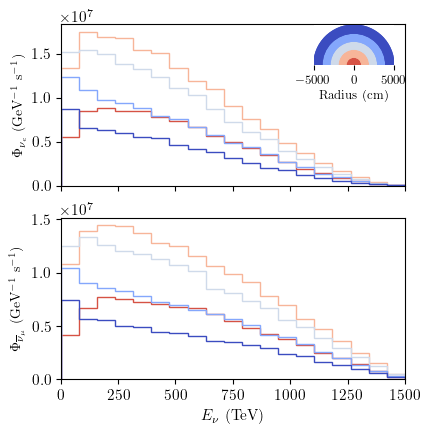

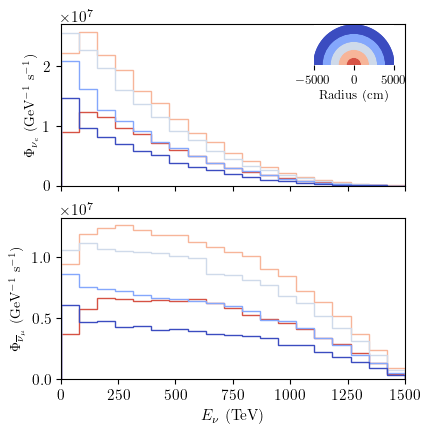

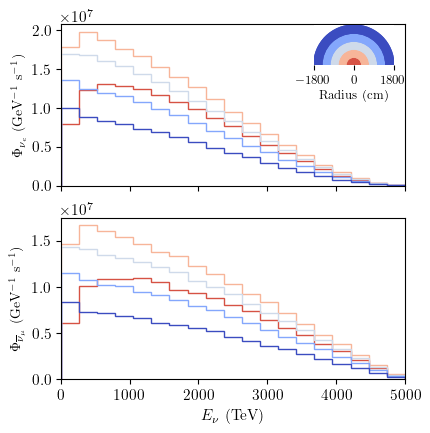

In [343]:
n=5
rmax = 50e2
make_net_plot(sim_muc_3tev, rmax=rmax, n_layers=n, nbins=20, cmap='coolwarm_r')
make_net_plot(sim_muc_3tev, rmax=rmax, n_layers=n, nbins=20, cmap='coolwarm_r', POL=0.8)

rmax = 18e2
make_net_plot(sim_muc, rmax=rmax, n_layers=n, nbins=20, cmap='coolwarm_r')

## Saving simulations to file

In [120]:
test = col_sims[0]
test.load_genie_events([f'Q2_mucols2_numu.txt',f'Q2_mucols2_nue.txt'], n_events = 1e6)

Loading generated data for a IMCC-II experiment;
It includes interactions from ν_μ, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Computing Q2...
Done!
Loading generated data for a IMCC-II experiment;
It includes interactions from ν_e, anti ν_e within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Computing Q2...
Done!


In [20]:
_=plt.hist(test.genie_events['nu_E'][test.genie_nuebar], bins =100, histtype='step', label='nuebar')
_=plt.hist(test.genie_events['nu_E'][test.genie_numu], bins =100, histtype='step', label='numu')
_=plt.hist(test.genie_events['nu_E'][test.genie_nue], bins =100, histtype='step', label='nue')
_=plt.hist(test.genie_events['nu_E'][test.genie_numubar], bins =100, histtype='step', label='numubar')
plt.legend()

AttributeError: 'DetectorSimulator' object has no attribute 'genie_events'

In [122]:
version = 'MH_test'
for design, sim in zip(col_designs, col_sims):
    with open(f'gen_data/{version}_{design["short_name"]}.pkl', 'wb') as f:
        pickle.dump(sim, f)

Text(0.5, 1.0, 'Neutrino fractional energy')

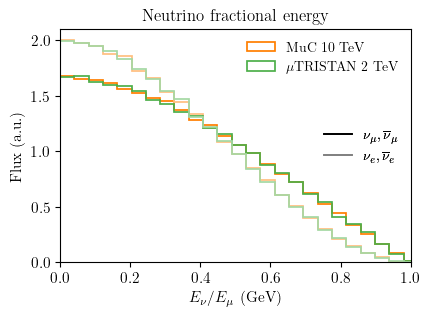

In [732]:
bins = np.linspace(0,2, 50)

light_factor = 0.5
LW=1.25

fig, ax = pt.std_fig()
def plot_curve(i):
    ax.hist(col_sims[i].mustorage_sims[1].pnu[:,0]/col_sims[i].design['beam_p0'], weights = col_sims[i].mustorage_sims[1].weights, bins = bins, histtype = 'step', label = col_sims[i].design['name'], color = pt.cblind_safe_wheel[i], zorder = 2, lw=LW, density=True)
    ax.hist(col_sims[i].mustorage_sims[0].pnu[:,0]/col_sims[i].design['beam_p0'], weights = col_sims[i].mustorage_sims[0].weights, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[i],light_factor), zorder = 2, lw=LW, density=True)

# plot_curve(0)
plot_curve(1)
plot_curve(2)
# plot_curve(3)
# plot_curve(4)

# standard legend
leg1 = ax.legend(loc = 'upper right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\nu_\mu,\overline\nu_\mu$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$\nu_e,\overline\nu_e$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center right')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$E_{\nu}/E_\mu$ (GeV)')
ax.set_ylabel(r'Flux (a.u.)')
# plt.xscale('log')
# ax.set_xlim(10,0.6*10**4)
ax.set_xlim(0,1)
ax.set_title(r'Neutrino fractional energy', fontsize = 12)
# plt.savefig('plots_Luc/posterplots/pl_e.jpg', bbox_inches = 'tight', dpi = 500)

In [733]:
def get_angle(p):
    return np.arccos(p[:,-1]/np.linalg.norm(p, axis = 1))


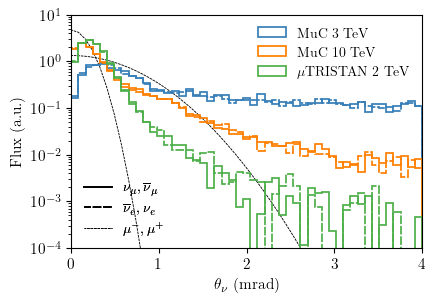

In [739]:
# bins = np.geomspace(1e-2,3, 100)
bins = np.linspace(0,4, 50)
light_factor = 1
LW=1.25
units = 1e3#180/np.pi
fig, ax = pt.std_fig()

kwargs = {'zorder': 2, 'lw': LW, 'histtype': 'step', 'bins': bins, 'cumulative': False, 'density': True}
def plot_curve(i, color=None):
    if color is None:
        color=i
    ax.hist(units*get_angle(col_sims[i].mustorage_sims[1].momenta), weights = col_sims[i].mustorage_sims[1].weights, label = col_sims[i].design['name'], color = pt.cblind_safe_wheel[color], **kwargs)
    ax.hist(units*get_angle(col_sims[i].mustorage_sims[0].momenta), weights = col_sims[i].mustorage_sims[0].weights, color = pt.lighten_color(pt.cblind_safe_wheel[color],light_factor), ls=(1,(5,1)), **kwargs)

plot_curve(0)
plot_curve(1)
plot_curve(2)
# plot_curve(3)
# plot_curve(4)

def gauss(x, mu, sigma):
    return 2/np.sqrt(2 * np.pi * sigma**2) * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

ax.plot(bins, gauss(bins, 0, 6e-4*units), color = 'black', lw = LW*0.5, ls=(1,(3,1)), zorder = 1)  #label = 'Gaussian ($\sigma = 0.60$~mrad)')
ax.plot(bins, gauss(bins, 0, 1.70e-4*units), color = 'black', lw = LW*0.5, ls=(1,(3,1)), zorder = 1)  #label = 'Gaussian ($\sigma = 0.17$~mrad)')
# standard legend
leg1 = ax.legend(loc = 'upper right')


# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\nu_\mu,\overline\nu_\mu$')
light_line = plt.Line2D([], [], color='black', lw=LW, ls=(1,(5,1)), label=r'$\overline\nu_e,\nu_e$')
lighter_line = plt.Line2D([], [], color='black', lw=LW/2, ls=(1,(3,1)), label=r'$\mu^{-},\mu^+$')
leg2 = ax.legend(handles=[dark_line, light_line,lighter_line], loc='lower left')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$\theta_\nu$ (mrad)')
ax.set_ylabel(r'Flux (a.u.)')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-4, 10)
ax.set_xlim(bins.min(), bins.max())
plt.savefig('plots/paper_plots/beam_size.pdf', bbox_inches = 'tight', dpi = 500)